# Deep Neural Networks 모델 개선

## 과대적합과(Overfitting) 과소적합(underfitting)
- 최적화(Optimization)와 일반화(generalization)
    - **최적화(Optimization)**: train data에서 최고의 성능을 얻으려고 모델을 조정하는 과정 (옵티마이저가 한다.)
    - **일반화(Generalization)**: 훈련된 모델이 처음 보는 데이터에서 얼마나 잘 수행되는지를 의미

- 과소적합(Underfitting)의 발생 
    - epoch가 진행될 수록 train loss와 test loss(validation loss)가 모두 안 좋음 
        - 핵심 : train loss도 안좋고 test loss도 안 좋다. 
        - 모형이 너무 단순하면 train loss가 줄어들 지 않는다. 그런 경우 좀더 복잡한 모델을 사용하거나 튜닝 필요
    - 모델의 성능이 발전될 여지가 있음 (optimization을 더 할 여지가 있음) 

- 과대적합(Overfitting)의 발생 
    - epoch가 진행되면서 **train loss는 계속 감소하지만(좋아짐) test loss(validation loss)가 증가(안 좋아짐)**하기 시작함
        - 핵심 : test loss가 않좋다 (새로운 데이터에 대한 예측이 안 좋다.) 일반화(generalization)되지 않은 모델
        - 좀더 심플한 모델을 사용하는 것을 생각해 봐야 한다.
    - 훈련 데이터에 특화된 패턴을 학습하기 시작하여 새로운 데이터에 대해 잘못된 판단 함 
  
  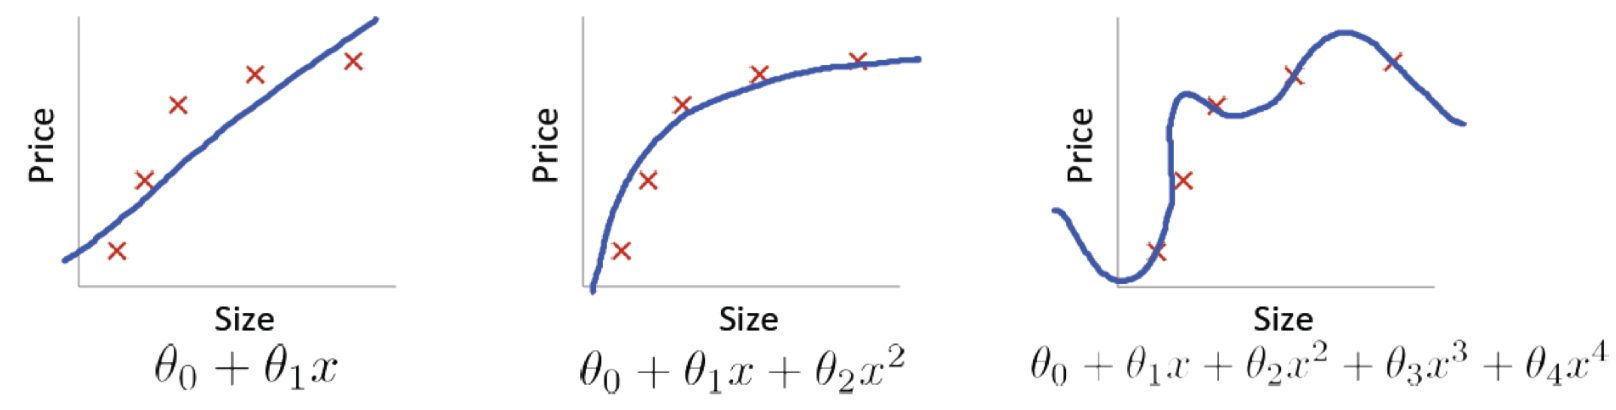
  
- 1번 : underfitting
- 2번 : generaliztion
- 3번 : overfitting 

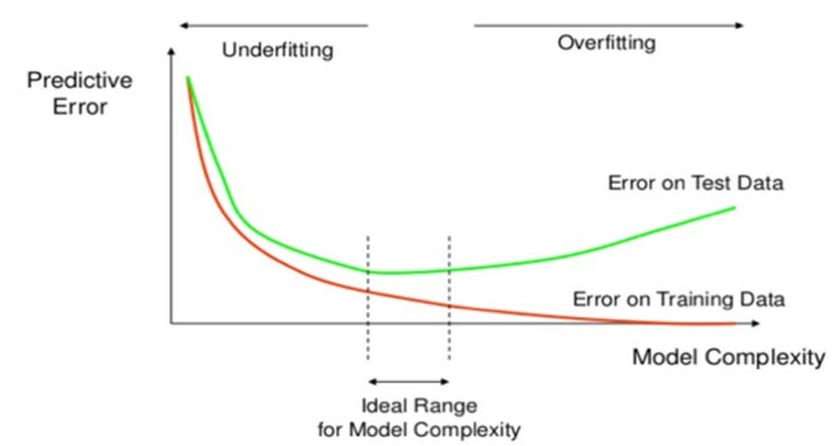


## 과대적합(Overfitting)을 방지하기 위한 방법
- **더 많은 data를 수집**
    - 모델이 복잡해도 학습 시킬 데이터가 충분히 많으면 괜찮다.
    - 일반적으로 데이터를 늘리는데는 시간과 돈이 많이 든다. 단 이미지의 경우 크기를 줄인다거나 회전등을 이용해 데이터를 어느정도 늘릴 수 있다.
- **모델의 간단하게 만든다.**
    - 대부분 경우 데이터 수집이 쉽지가 않다. 그런 경우 모델을 간단하게 바꾼다.

### 과대적합을 방지하기 위한 규제 방식은 모두 모델을 간단하게 만드는 방법들이다.

## DNN 모델 간단하게 만들기

### Network size를 줄인다.
- 모델의 크기를 줄여 학습 파라미터(가중치) 수를 줄임
- Layer의 수, 각 layer의 unit 수를 조정 
- 적은 수의 layer, unit에서 시작해서 증가시켜 가면서 validation loss의 감소 추세를 관찰 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [50]:
with open('imdb_data/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('imdb_data/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('imdb_data/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('imdb_data/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

## Layer 생성

In [52]:
# hidden layer: 2, 노드: 각각 16개
from tensorflow.keras import models, layers
basic_model=models.Sequential() 
basic_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
basic_model.add(layers.Dense(16, activation='relu'))
basic_model.add(layers.Dense(1, activation='sigmoid'))

In [53]:
basic_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [54]:
basic_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
# hidden: 2, node는 각각: 4
small_model=models.Sequential() 
small_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
small_model.add(layers.Dense(4, activation='relu'))
small_model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
small_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [57]:
small_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

## 학습

In [58]:
basic_hist=basic_model.fit(X_train_vec ,y_train, epochs=20, batch_size=128, validation_data=(X_test_vec, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 17s 694us/sample - loss: 0.5085 - accuracy: 0.8178 - val_loss: 0.3281 - val_accuracy: 0.8722
Epoch 2/20
25000/25000 [==============================] - 11s 437us/sample - loss: 0.2304 - accuracy: 0.9117 - val_loss: 0.2903 - val_accuracy: 0.8753
Epoch 3/20
25000/25000 [==============================] - 9s 356us/sample - loss: 0.1678 - accuracy: 0.9389 - val_loss: 0.3179 - val_accuracy: 0.8656
Epoch 4/20
25000/25000 [==============================] - 9s 361us/sample - loss: 0.1331 - accuracy: 0.9550 - val_loss: 0.3582 - val_accuracy: 0.8582
Epoch 5/20
25000/25000 [==============================] - 9s 352us/sample - loss: 0.1078 - accuracy: 0.9653 - val_loss: 0.4134 - val_accuracy: 0.8491
Epoch 6/20
25000/25000 [==============================] - 9s 363us/sample - loss: 0.0874 - accuracy: 0.9739 - val_loss: 0.4710 - val_accuracy: 0.8438
Epoch 7/20
25000/25000 [========================

In [59]:
small_hist=small_model.fit(X_train_vec ,y_train, epochs=20, batch_size=128, validation_data=(X_test_vec, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 10s 395us/sample - loss: 0.6255 - accuracy: 0.7141 - val_loss: 0.5479 - val_accuracy: 0.8214
Epoch 2/20
25000/25000 [==============================] - 9s 365us/sample - loss: 0.4361 - accuracy: 0.8850 - val_loss: 0.3882 - val_accuracy: 0.8714
Epoch 3/20
25000/25000 [==============================] - 9s 349us/sample - loss: 0.2919 - accuracy: 0.9119 - val_loss: 0.3178 - val_accuracy: 0.8764
Epoch 4/20
25000/25000 [==============================] - 9s 353us/sample - loss: 0.2225 - accuracy: 0.9252 - val_loss: 0.2956 - val_accuracy: 0.8772
Epoch 5/20
25000/25000 [==============================] - 9s 357us/sample - loss: 0.1860 - accuracy: 0.9361 - val_loss: 0.2940 - val_accuracy: 0.8767
Epoch 6/20
25000/25000 [==============================] - 9s 346us/sample - loss: 0.1618 - accuracy: 0.9446 - val_loss: 0.3016 - val_accuracy: 0.8713
Epoch 7/20
25000/25000 [=========================

## loss, va_loss의 epoch별 변화량을 그래프화

C:\Users\dearm\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dearm\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dearm\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dearm\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dearm\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  

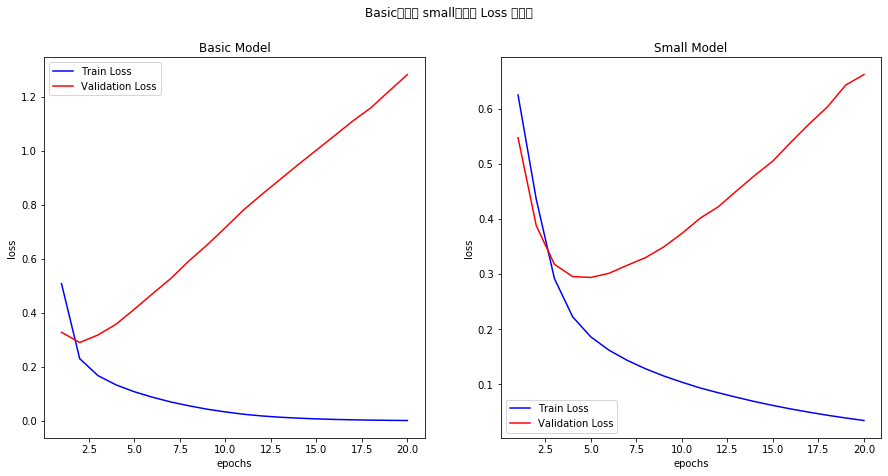

In [60]:
fig=plt.figure(figsize=(15,7), facecolor='w')
fig.suptitle('Basic모델과 small모델의 Loss 변화량')  # figure제목

epochs=range(1,21)
# basic model 결과
plt.subplot(1,2,1)
plt.plot(epochs, basic_hist.history['loss'], c='blue', label='Train Loss')
plt.plot(epochs, basic_hist.history['val_loss'], c='red', label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Basic Model')

# small model 결과
plt.subplot(1,2,2)
plt.plot(epochs, small_hist.history['loss'],c='blue', label='Train Loss')
plt.plot(epochs, small_hist.history['val_loss'], c='red', label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Small Model')

plt.show()

- Smaller model
    - training loss 감소 속도는 더 느림 
    - overfitting이 발생할 여지가 적음 
    - 충분히 train loss가 감소하지 않을 수 있음 (즉, optimization이 덜 됨)
    - validation loss가 최소화 될 때까지 걸리는 시간이 오래 걸림 
- Bigger model
    - validation loss가 초기부터 증가 추세: overfitting 발생 
    - Bigger model의 train loss는 빠르게 감소 
    - train data에 대해 optimization이 잘 되지만 validation set에 대해 성능이 좋지 않음 
    
- 어떻게 최적의 네트워크를 찾는가? 
    - 작은 크기의 모형에서부터 시작 
    - 네트워크 크기를 증가시키면서 (layer의 수, 각 layer의 unit의 수 증가) train loss가 충분히 감소하는지, validation loss가 증가하는지 체크 
    




###  Dropout Layer 추가를 통한 Overfitting 규제
- 최근 방식
- Neural network를 위해 사용되는 regularization 기법 중에서 가장 효과적이고 널리 사용되는 방법 중 하나
    - Overfitting의 이유는 너무 복잡한 모델. 
    - 데이터 양에 비해 Layer, Unit(노드)가 많으면 복잡한 모델(Network)이다. 
- Dropout Node: 학습시(fit) 일부 Unit(노드)를 빼고 진행한다.
- 매 반복(epochs) 마다 Random하게 선택된 Unit(노드)를 training 진행 
    - 앙상블의 효과도 있다.
- 일반적으로 dropout rate=0.2~0.5 를 지정한다.
- Test set에 대해서는 적용하지 않음 

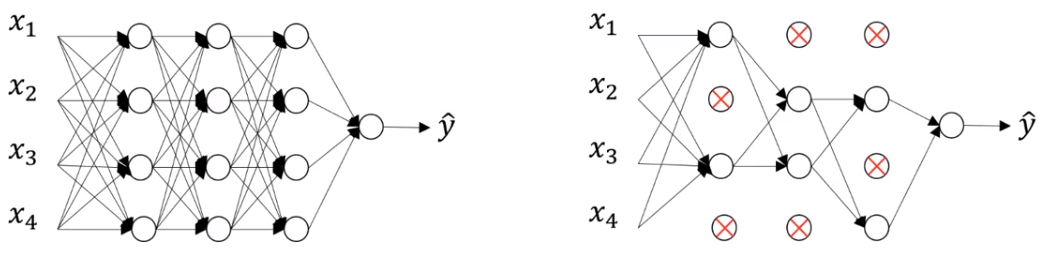

In [61]:
dropout_rate=0.5

do_model=models.Sequential()
do_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
do_model.add(layers.Dropout(dropout_rate))
do_model.add(layers.Dense(64, activation='relu'))
do_model.add(layers.Dropout(dropout_rate))
do_model.add(layers.Dense(1, activation='sigmoid'))

In [62]:
do_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
import os, time
path='models'
if not os.path.isdir(path):
    os.mkdir(path)
    
curr=time.strftime('%Y%m%d-%H%M%S')  # 현재날짜와 시간을 문자열로 - 실행시간을 나타내기 위해
curr

'20200108-142748'

In [64]:
type(y_train[0]),type(X_train_vec)

(numpy.int32, scipy.sparse.csr.csr_matrix)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback_list=[EarlyStopping(monitor='val_loss', patience=10),
                ModelCheckpoint(filepath=path+'imdb_model_'+curr+'.h5',
                                monitor='val_loss',
                                save_best_only=True)]

In [70]:
callback_list                    

In [73]:
do_model.fit(X_train_vec,y_train,epochs=1000, batch_size=128, 
             validation_data=(X_test_vec, y_test),callbacks=callback_list)

Train on 25000 samples, validate on 25000 samples
Epoch 1/1000
25000/25000 [==============================] - 19s 775us/sample - loss: 0.4404 - accuracy: 0.8187 - val_loss: 0.2911 - val_accuracy: 0.8786
Epoch 2/1000
25000/25000 [==============================] - 16s 631us/sample - loss: 0.2227 - accuracy: 0.9142 - val_loss: 0.3065 - val_accuracy: 0.8707
Epoch 3/1000
25000/25000 [==============================] - 15s 618us/sample - loss: 0.1595 - accuracy: 0.9431 - val_loss: 0.3474 - val_accuracy: 0.8610
Epoch 4/1000
25000/25000 [==============================] - 15s 598us/sample - loss: 0.1158 - accuracy: 0.9617 - val_loss: 0.3990 - val_accuracy: 0.8556
Epoch 5/1000
25000/25000 [==============================] - 16s 627us/sample - loss: 0.0813 - accuracy: 0.9742 - val_loss: 0.4730 - val_accuracy: 0.8505
Epoch 6/1000
25000/25000 [==============================] - 15s 618us/sample - loss: 0.0579 - accuracy: 0.9828 - val_loss: 0.5358 - val_accuracy: 0.8505
Epoch 7/1000
25000/25000 [======

## Keras callbacks 을 이용

- callback은 학습시 특정 이벤트 발생시 호출되는 다양한 함수를 제공하여 자동화 처리를 지원한다. (cf: 프로그래밍의 콜백함수)
- 다양한 콜백 클래스가 제공된다.
    - https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
- `EarlyStopping`: Validation set에 대한 평가지표가  더 이상 개선되지 않을 때 학습을 자동으로 멈춤
    - `monitor`: 모니터링할 평가지표 지정. (ex: accuracy)
    - `patience`: epoch 수 지정. validation 평가 지표가 개선이 안되더라도 지정한 epoch만큼 반복한다. 지정한 epoch만큼 반복 후에도 개선이 되지 않으면 중단한다. 
- `ModelCheckpoint`: 지정한 measure(예:validation loss)가 최소값일 때의 모델과 weight를 저장하여 overfitting이 발생하기 전의 model을 나중에 불러들여 사용할 수 있음
    - `save_best_only=True`: monitoring 중인 measure를 기준으로 최적의 모형의 weight만 저장 
- **callback 객체들을 리스트로 묶은 뒤 fit()의 callback 매개변수에 전달한다.**

## 3.3 Hyper parameter tuning


- Parameters
    - 모델이 학습하여 업데이트할 대상
        - Weights $W$
        - Bias $b$
- Hyper parameters
    - 모형의 구조를 결정하거나 optimization 방법을 결정하는 변수들 
    - $W$, $b$를 최종적으로 결정 
        - Optimizer의 종류
        - learning rate($\alpha$)
        - Hidden layer의 수 
        - Hidden unit의 수 
        - Iteration의 수 
        - Activation function의 종류
        - Minibatch size 
        - Regularization
            - drop out등               
    
- 다양한 조합의 hyper parameter를 시도해서 loss 함수가 빠르게 감소하는 hyper parameter를 찾아내는 시도가 필요 

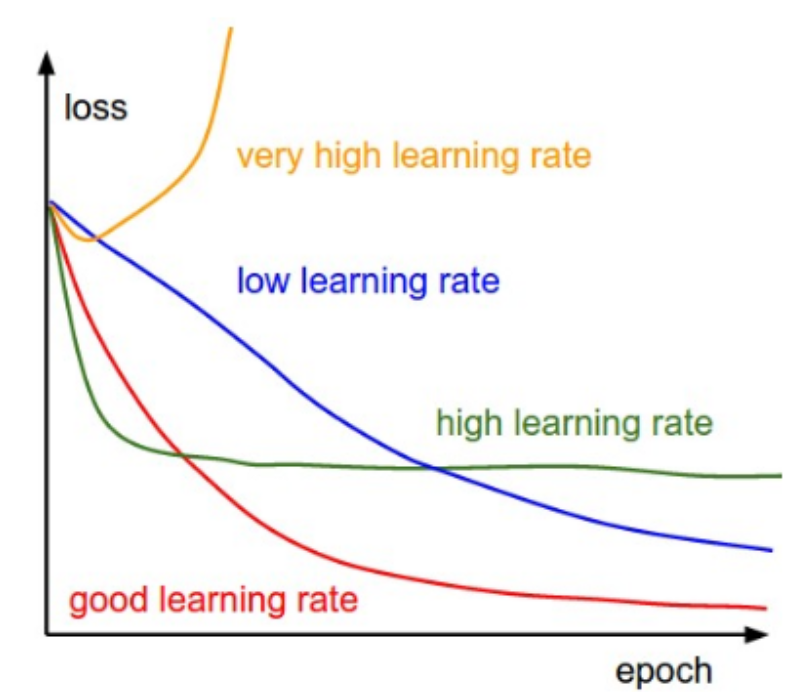



- Hyper parameter가 모형 성능을 좌우 
- **고려해야 할 주요한 hyper parameters**
    - Learning rate($\alpha$): **일반적으로 가장 중요 **
        - learning_rate 이 작으면 너무 완만히, 크면 급격히 떨어진다.
    - Hidden units의 수 
    - Mini-batch size : 가중치 업데이트에 기준 sample 수
    - Layers의 수

## 3.4 The universal workflow of machine learning 

#### (1) 문제 정의와 데이터셋 수집 
- 무엇을 예측하려 하는가? 이를 예측하기 위한 training data가 있는가? 
    - Ex) 영화 리뷰의 감성 분류를 학습하기 위해서는 각 영화 리뷰의 감성 레이블이 태깅되어 있는 데이터가 있어야 함 

- 예측하려는 문제의 종류는 무엇인가?
    - Binary classification
    - Multi-class classification 
    - Multi-label classification
    - Regression
    - Clustering
    - Reinforcement learning 
    
    

#### (2) 성공 지표의 선택
- ROC AUC는 일반적인 지표 
- 클래스 분포가 균일하지 않다면 precision(=TP/(TP+FP)), recall(=TP/(TP+FN))을 사용할 수 있음

#### (3) 평가 방법 선택
- Hold-out validation set 사용
    - Train data의 일정 부분을 validation set으로 사용 
    - 데이터의 양이 많을 때 사용하는 방법
    - `fit()`의 `validation_data` 또는 `validation_split`
- K-fold cross-validation
    - Train set을 K-개의 무작위 set으로 구분한 뒤 하나씩 validation set으로 사용하며 반복
    - Hold-out validation set을 구성하기에 데이터가 적을 때 사용  
    - Keras 자체의 cv 모듈이 없으므로 scikit-learn의 `KFold`를 사용 
    - **딥러닝의 경우** 데이터가 많을 경우 사용한다. 데이터가 많으면 궂이 교차검증(cross validation)할 필요 없다.
- Iterated K-fold cross-validation 
    - K-fold Cross Validation을 반복
    - 데이터가 적으나 정확한 모델 평가가 필요할 때 사용 

#### (4) 데이터 준비 
- Input data는 일반적으로 [-1,1] 혹은 [0,1] 사이의 데이터로 **스케일 조정**
- 사용하려는 모델에 맞는 input 형태로 조정 

#### (5) Baseline보다 나은 모델 훈련 

- 마지막 layer의 activation function 선택
    - output의 형태에 따라 조정
    - Sigmoid, softmax, linear 등
- Loss function 선택
    - 풀고자 하는 문제의 종류에 따라 선택
    - binary_crossentropy, categorical_crossentropy, mse 등
    - 미분 가능해야 하고 주어진 mini-batch에서 계산 가능해야 함. 
- Optimizer와 learning rate 선택 
    - rmsprop, adam과 default learning rate 사용이 무난 

#### (6) Scaling up: overfitting 모델 구축 
- 작은 모델에서 부터 충분한 성능을 나타내는 모델을 만들기 위해 모형을 크게 확장 
    - Layer 추가 
    - 각 layer의 unit 추가 
    - Epoch 수 증가 
- train loss와 validation loss를 모니터 

#### (7) Regularization, hyper parameter tuning 
- 반복적으로 모델 수정, 훈련, 평가하며 모델 튜닝 
    - Dropout 추가 
    - Layer 추가 혹은 제거 
    - L1 또는 L2 penalty 추가 
    - Layer의 unit 수나 learning rate의 튜닝 
    
- 주의: 이 과정을 반복한다는 것은 validation set에  대해 모델이 적합되고 있는 것이기 때문에 이후 test set에서의 성능이 validation 성능보다 낮아질 수 있음 (즉, validation set에 overfitting) 
